In [1]:
{}

{}

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from random import *

loaded_data = datasets.load_iris()
x = loaded_data.data # instances
y = loaded_data.target # labels
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [13]:
from sklearn import neighbors
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Place variables that you may tweak at the top of your code
num_folds = 5
seed = 12 # I don't think this is being used. Make sure to find out how to use this.
num_features_add = 100
max_range = 5

kf5 = KFold(n_splits=num_folds, shuffle=True)
# copy x from the cell above since x_new gets modified every run of this cell
x_new = x


accuracyList = []
featuresList = []
# Your while loop was fine, but the for range loop is more Pythonic
for counter in range(num_features_add):
    # The values in the new feature originally ranged between 0 and 1. To make
    # the graph more dramatic, I changed the range from 0 to max_range.
    x_rand = np.random.random((150,1))*max_range
    x_new = np.append(x_new,x_rand,1)
    # For each modified dataset we will run our experiment num_folds times.
    # We can sum the accuracies of each run then divide the total accuracy by num_folds
    # to find the average accuracy.
    total_accuracy = 0
    # KFold creates num_folds equally sized subsets of the data called folds or splits.
    # In each iteration of the for loop train_index uses num_folds-1 folds and the 
    # test_index uses the remaining fold, called the hold-out fold. The hold-out fold
    # changes every iteration.
    for train_index, test_index in kf5.split(x_new):
        x_train = x_new[train_index]
        x_test = x_new[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=seed)
        nn_model = neighbors.KNeighborsClassifier(3)
        nn_model.fit(x_train, y_train)
        predictions = nn_model.predict(x_test)
        total_accuracy += accuracy_score(y_test, predictions) 
    accuracyList.append(total_accuracy/num_folds)
    featuresList.append(counter + 4)



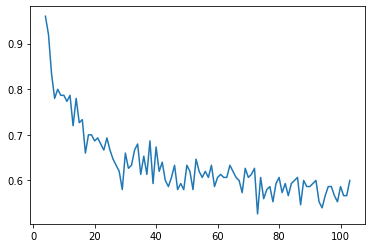

In [14]:
from matplotlib import pyplot as plt
plt.plot(featuresList,accuracyList)
# Whenever you create a plot it should always have a title, some kind of legend (you can be creative here), and labeled axes.

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from random import *

loaded_data = datasets.load_iris()
x = loaded_data.data # instances
y = loaded_data.target # labels

In [7]:
from sklearn.ensemble import RandomForestClassifier
counter = 0
seed = 11
accuracyList = []
featuresList = []
while counter != 1000:
    x_rand = np.random.random((150,1))
    x = np.append(x,x_rand,1)
    for x_train, x_test in kf5.split(x):
        x_train = x[x_train]
        x_test = x[x_test]
    for y_train, y_test in kf5.split(y):
        y_train = y[y_train]
        y_test = y[y_test]
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=seed)
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    accuracyList.append(accuracy_score(y_test, predictions))
    featuresList.append(counter + 4)
    counter += 1

# focuses on dimensions with signal

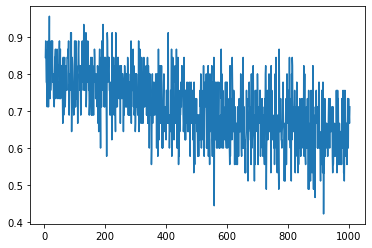

In [36]:
from matplotlib import pyplot as plt
plt.plot(featuresList,accuracyList)

In [ ]:
# 